In [19]:
## START ##
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df = pd.read_csv('./data/data2021.student.csv')

Unique Values
	The following columns have 20 or less unique values (likely categorical): ['Class', 'C2', 'C3', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C17', 'C18', 'C20', 'C21', 'C22', 'C23', 'C24', 'C26', 'C27', 'C28', 'C29', 'C30', 'C32']
Converting classes with less than 10 unique values to categorical...
Done!

Missing Values:
	The following columns have missing values: ['Class', 'C3', 'C4', 'C11', 'C13', 'C29', 'C32']
	The followng are the per-column missing data ratios: {'Class': 0.09090909090909091, 'C3': 0.006363636363636364, 'C4': 0.006363636363636364, 'C11': 0.9954545454545455, 'C13': 0.005454545454545455, 'C29': 0.005454545454545455, 'C32': 0.9954545454545455}

Useless Data:
	Class is just a label, so it's obviously useless

Duplicate Columns:
Analysing column correlations
	Numeric Column Correlations:


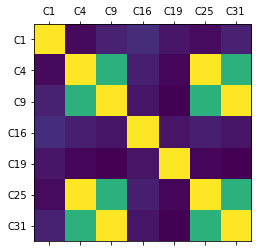

	Categorical Column Correlations:
RANGE
Index(['Class', 'C2', 'C3', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13',
       'C14', 'C15', 'C17', 'C18', 'C20', 'C21', 'C22', 'C23', 'C24', 'C26',
       'C27', 'C28', 'C29', 'C30', 'C32'],
      dtype='object')


ValueError: The number of FixedLocator locations (26), usually from a call to set_ticks, does not match the number of ticklabels (27).

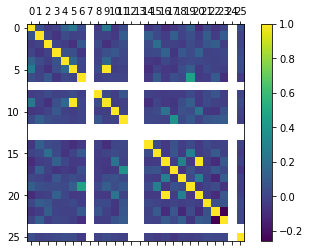

In [24]:
import warnings
warnings.filterwarnings("ignore")

df_no_id = df.drop(['ID'], axis=1)

## Column Investigation ##
## Unique Values
print("Unique Values")
lt_20_unique = [col for col in df.columns if df[col].nunique() <= 20]
print(f"\tThe following columns have 20 or less unique values (likely categorical): {lt_20_unique}")

print("Converting classes with less than 10 unique values to categorical...")
df[lt_20_unique] = df[lt_20_unique].astype('category')
print("Done!")

## Missing Values
print("\nMissing Values:")
# Find cols with any missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().sum() > 0]
print(f"\tThe following columns have missing values: {cols_with_missing}")

# Find number of missing values per col
# Get proportion of each one missing
missing_ratios = [df[col].isnull().sum()/len(df) for col in df.columns]
missing_ratios_dict = {col:ratio for (col, ratio) in zip(list(df.columns), missing_ratios) if ratio > 0}
print(f"\tThe followng are the per-column missing data ratios: {missing_ratios_dict}")

## Useless Data
print("\nUseless Data:")
print(f"\tClass is just a label, so it's obviously useless") # TODO way to demonstrate this?

## Duplicate Columns
print("\nDuplicate Columns:")

print("Analysing column correlations")
# Numeric columns
numeric_cors = df_no_id.corr()
with open('./corr.txt', 'w') as save_file:
    save_file.write(numeric_cors.to_string())
print("\tNumeric Column Correlations:")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(numeric_cors, interpolation='nearest')
ax.set_xticklabels(['']+list(numeric_cors.columns))
ax.set_yticklabels(['']+list(numeric_cors.columns))

plt.show()

# Categorical Columns
cat_cors = df.select_dtypes(include='category').apply(lambda x : pd.factorize(x)[0]).corr()

print("\tCategorical Column Correlations:")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cat_cors, interpolation='nearest')
fig.colorbar(cax)
n = 27
ax.set_xticks(np.arange(n))
ax.set_xticklabels(['']+list(cat_cors.columns))
ax.set_yticks(np.arange(n))
ax.set_yticklabels(['']+list(cat_cors.columns))

plt.setp([tick.label1 for tick in ax.xaxis.get_major_ticks()], rotation=45,
         ha="right", va="center", rotation_mode="anchor")
# Rotate and align top ticklabels
plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=45,
         ha="left", va="center",rotation_mode="anchor")

plt.show()

print("\nDuplicate Rows:")
# duplicate_rows = df.iloc[]
duplicate_rows = df[df_no_id.duplicated()]
print(f"\tBasic row duplication search identified {len(duplicate_rows)} duplicate rows: {list(duplicate_rows['ID'])}")


# TODO outlier detection

In [ ]:
# Get some basic data
print(f"Columns (Counted): {len(df.columns)}")
print(df.columns)

print(f"Row Count: {len(df)}")

print("Summary:")
df.describe()

print("Unique:")
df.nunique()